In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
path = 'player_segment/player_img.jpg'

In [4]:
image = cv2.imread(path)

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

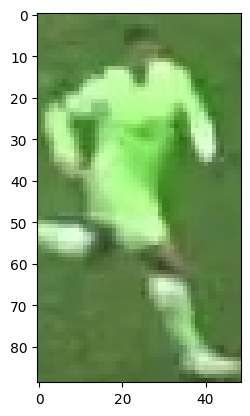

In [6]:
plt.imshow(image)
plt.show()

### Get the jersey of player

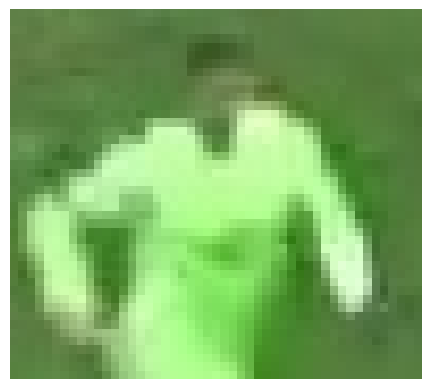

In [8]:
# Extract and display the upper portion of the image
jersey_height = int(image.shape[0] / 2)
shirt_section = image[:jersey_height, :]

# Display the extracted image section
plt.imshow(shirt_section)
plt.axis('off')
plt.show()

### Cluster the image to cluster t-shirt color from background

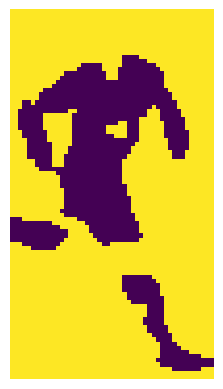

In [17]:
pixels = image.reshape(-1, 3)
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(pixels)
pixel_clusters = kmeans_model.labels_
segmented_op = pixel_clusters.reshape(image.shape[:2])
plt.imshow(segmented_op, cmap='viridis')
plt.axis('off')
plt.show()


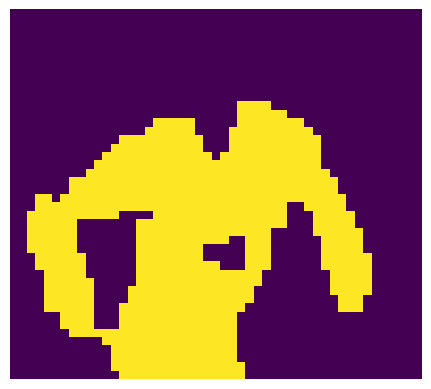

In [18]:
# Convrt the image to 2d pizxel array
pixels = shirt_section.reshape(-1, 3)

# Apply KMeans clustering to segment the image into 2 regions
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(pixels)
pixel_clusters = kmeans_model.labels_

# Reshape the cluster back.
segmented_op = pixel_clusters.reshape(shirt_section.shape[:2])

# Visualize
plt.imshow(segmented_op, cmap='viridis')
plt.axis('off')
plt.show()


### Get the mapping for corner to get the background cluster value

In [19]:
# Extract pixel cluster labels from the four corners
corners = [
    segmented_op[0, 0],
    segmented_op[0, -1],
    segmented_op[-1, 0],
    segmented_op[-1, -1]
]

# Determine the most common cluster label among the corners
bg_label = max(set(corners), key=corners.count)
print(bg_label)


0


In [20]:
corner_clusters = [segmented_op[0, 0], segmented_op[0, -1], segmented_op[-1, 0], segmented_op[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [27]:
# Compute the player cluster assuming binary classification
foreground_label = abs(1 - bg_label)
print(foreground_label)

# Retrieve the RGB center of the player cluster
player_rgb = kmeans_model.cluster_centers_[foreground_label]
print("player cluster", player_rgb)

1
player cluster [171.38378378 235.65405405 142.8472973 ]
